## NLP Sentiment Analysis of IMDB Dataset

##### Preprocessing, Exploratory Data Analysis and Part-of-Speech Tagging

In [1]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter
import matplotlib.pyplot as plt
from datasets import load_dataset

In [2]:
imdb_data = load_dataset('imdb')
print(imdb_data['train'][0])

semeval_data = load_dataset('sem_eval_2018_task_1', 'subtask5.english')
print(semeval_data['train'][0])

Found cached dataset imdb (/home/sher4672/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0)


  0%|          | 0/3 [00:00<?, ?it/s]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

Found cached dataset sem_eval_2018_task_1 (/home/sher4672/.cache/huggingface/datasets/sem_eval_2018_task_1/subtask5.english/1.1.0/a7c0de8b805f1988b118882fb289ccfbbeb9085c7820b6f046b5887e234af182)


  0%|          | 0/3 [00:00<?, ?it/s]

{'ID': '2017-En-21441', 'Tweet': "“Worry is a down payment on a problem you may never have'. \xa0Joyce Meyer.  #motivation #leadership #worry", 'anger': False, 'anticipation': True, 'disgust': False, 'fear': False, 'joy': False, 'love': False, 'optimism': True, 'pessimism': False, 'sadness': False, 'surprise': False, 'trust': True}


In [3]:
print("IMDB dataset structure: ", imdb_data)

IMDB dataset structure:  DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


In [4]:
sentiment_counts = Counter([x['label'] for x in imdb_data['train']])
print("Sentiment counts: ", sentiment_counts)

Sentiment counts:  Counter({0: 12500, 1: 12500})


In [5]:
# Compute the number of unique words and average review length
words = []
review_lengths = []
for example in imdb_data['train']:
    tokens = word_tokenize(example['text'])
    words.extend(tokens)
    review_lengths.append(len(tokens))

print("Number of unique words: ", len(set(words)))
print("Average review length: ", sum(review_lengths) / len(review_lengths))


Number of unique words:  132093
Average review length:  282.61352


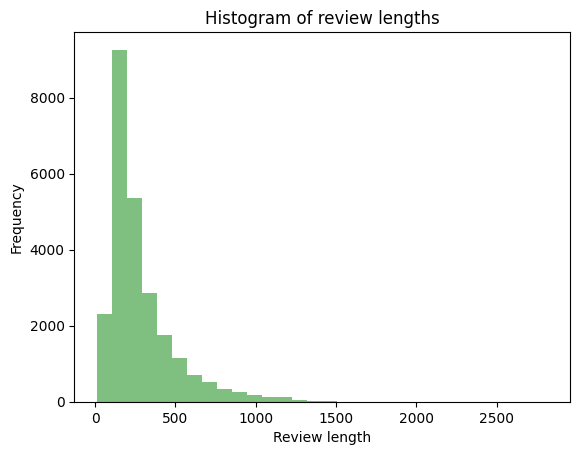

In [6]:
plt.hist(review_lengths, bins=30, alpha=0.5, color='g')
plt.title('Histogram of review lengths')
plt.xlabel('Review length')
plt.ylabel('Frequency')
plt.show()

In [7]:
import nltk
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return lemmatized_tokens

preprocessed_reviews = [preprocess_text(example['text']) for example in imdb_data['train']]


[nltk_data] Downloading package wordnet to /home/sher4672/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
#Part-of-Speech (POS) tagging on the preprocessed text
tagged_reviews = [pos_tag(review) for review in preprocessed_reviews]

[('I', 'PRP'), ('rented', 'VBD'), ('I', 'PRP'), ('AM', 'VBP'), ('CURIOUS-YELLOW', 'JJ'), ('video', 'NN'), ('store', 'NN'), ('controversy', 'NN'), ('surrounded', 'VBD'), ('first', 'RB'), ('released', 'VBN'), ('1967', 'CD'), ('.', '.'), ('I', 'PRP'), ('also', 'RB'), ('heard', 'VBD'), ('first', 'JJ'), ('seized', 'JJ'), ('U.S.', 'NNP'), ('custom', 'NN'), ('ever', 'RB'), ('tried', 'VBD'), ('enter', 'JJ'), ('country', 'NN'), (',', ','), ('therefore', 'RB'), ('fan', 'NN'), ('film', 'NN'), ('considered', 'VBN'), ('``', '``'), ('controversial', 'JJ'), ("''", "''"), ('I', 'PRP'), ('really', 'RB'), ('see', 'VB'), ('myself.', 'JJ'), ('<', 'NNP'), ('br', 'NN'), ('/', 'NNP'), ('>', 'NNP'), ('<', 'NNP'), ('br', 'NN'), ('/', 'NNP'), ('>', 'VBZ'), ('The', 'DT'), ('plot', 'NN'), ('centered', 'VBD'), ('around', 'IN'), ('young', 'JJ'), ('Swedish', 'JJ'), ('drama', 'NN'), ('student', 'NN'), ('named', 'VBN'), ('Lena', 'NNP'), ('want', 'VBP'), ('learn', 'NN'), ('everything', 'NN'), ('life', 'NN'), ('.', '.')

In [75]:
import pandas as pd
import random

random_review = random.choice(tagged_reviews)
df = pd.DataFrame(random_review, columns=['Word', 'POS tag'])
print(df)

        Word POS tag
0         If      IN
1   planning      JJ
2       rent      NN
3        buy      NN
4      movie      NN
5        n't      RB
6          .       .
7         It     PRP
8         's     VBZ
9      worst      JJ
10     thing      NN
11         I     PRP
12      ever      RB
13      seen     VBN
14         .       .
15         I     PRP
16     would      MD
17   comment      VB
18        It     PRP
19        10      CD
20      year      NN
21     since      IN
22         I     PRP
23       saw     VBD
24   blanked     VBN
25      mind      NN
26         .       .
27      Save      VB
28      time      NN
29     money      NN
30      well      RB
31      stay      RB
32       far      RB
33       far      RB
34      away      RB
35         .       .


Print some example tagged reviews

In [9]:
for tagged_review in tagged_reviews[:5]:
    print(tagged_review)

[('I', 'PRP'), ('rented', 'VBD'), ('I', 'PRP'), ('AM', 'VBP'), ('CURIOUS-YELLOW', 'JJ'), ('video', 'NN'), ('store', 'NN'), ('controversy', 'NN'), ('surrounded', 'VBD'), ('first', 'RB'), ('released', 'VBN'), ('1967', 'CD'), ('.', '.'), ('I', 'PRP'), ('also', 'RB'), ('heard', 'VBD'), ('first', 'JJ'), ('seized', 'JJ'), ('U.S.', 'NNP'), ('custom', 'NN'), ('ever', 'RB'), ('tried', 'VBD'), ('enter', 'JJ'), ('country', 'NN'), (',', ','), ('therefore', 'RB'), ('fan', 'NN'), ('film', 'NN'), ('considered', 'VBN'), ('``', '``'), ('controversial', 'JJ'), ("''", "''"), ('I', 'PRP'), ('really', 'RB'), ('see', 'VB'), ('myself.', 'JJ'), ('<', 'NNP'), ('br', 'NN'), ('/', 'NNP'), ('>', 'NNP'), ('<', 'NNP'), ('br', 'NN'), ('/', 'NNP'), ('>', 'VBZ'), ('The', 'DT'), ('plot', 'NN'), ('centered', 'VBD'), ('around', 'IN'), ('young', 'JJ'), ('Swedish', 'JJ'), ('drama', 'NN'), ('student', 'NN'), ('named', 'VBN'), ('Lena', 'NNP'), ('want', 'VBP'), ('learn', 'NN'), ('everything', 'NN'), ('life', 'NN'), ('.', '.')

Part-of-speech tagging is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech, based on both its definition and its context—i.e., its relationship with adjacent and related words in a phrase, sentence, or paragraph. This is beneficial in many NLP tasks such as Named Entity Recognition, Question Answering systems, and Machine Translation. It can also be used for adding linguistic features in text classification, improving the performance of the models.

##### Sentiment Analysis with Bag of Words (BoW) and TF-IDF

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert preprocessed_reviews into a list of strings for vectorization
preprocessed_reviews_str = [' '.join(review) for review in preprocessed_reviews]

In [11]:
# Create labels for the reviews
labels = [x['label'] for x in imdb_data['train']]

In [12]:
# Convert the preprocessed IMDB movie reviews into a matrix of token counts (BoW)
vectorizer_bow = CountVectorizer()
reviews_bow = vectorizer_bow.fit_transform(preprocessed_reviews_str)

In [13]:
# Represent the reviews using TF-IDF
vectorizer_tfidf = TfidfVectorizer()
reviews_tfidf = vectorizer_tfidf.fit_transform(preprocessed_reviews_str)

In [14]:
# Divide the dataset into train-test set with a split of 80:20 ratio
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(reviews_bow, labels, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(reviews_tfidf, labels, test_size=0.2, random_state=42)

In [15]:
clf_bow = LogisticRegression()
clf_bow.fit(X_train_bow, y_train_bow)

clf_tfidf = LogisticRegression()
clf_tfidf.fit(X_train_tfidf, y_train_tfidf)

/home/sher4672/projects/def-hsajjad/sher4672/miniconda3/envs/IKE_editing/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred_bow = clf_bow.predict(X_test_bow)
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)

In [17]:
print("BoW - Accuracy: ", accuracy_score(y_test_bow, y_pred_bow))
print("BoW - Precision: ", precision_score(y_test_bow, y_pred_bow))
print("BoW - Recall: ", recall_score(y_test_bow, y_pred_bow))
print("BoW - F1 Score: ", f1_score(y_test_bow, y_pred_bow))

print("TF-IDF - Accuracy: ", accuracy_score(y_test_tfidf, y_pred_tfidf))
print("TF-IDF - Precision: ", precision_score(y_test_tfidf, y_pred_tfidf))
print("TF-IDF - Recall: ", recall_score(y_test_tfidf, y_pred_tfidf))
print("TF-IDF - F1 Score: ", f1_score(y_test_tfidf, y_pred_tfidf))

BoW - Accuracy:  0.8826
BoW - Precision:  0.8724489795918368
BoW - Recall:  0.8945674044265594
BoW - F1 Score:  0.8833697595867276
TF-IDF - Accuracy:  0.8858
TF-IDF - Precision:  0.874120406567631
TF-IDF - Recall:  0.8997987927565393
TF-IDF - F1 Score:  0.8867737457862384


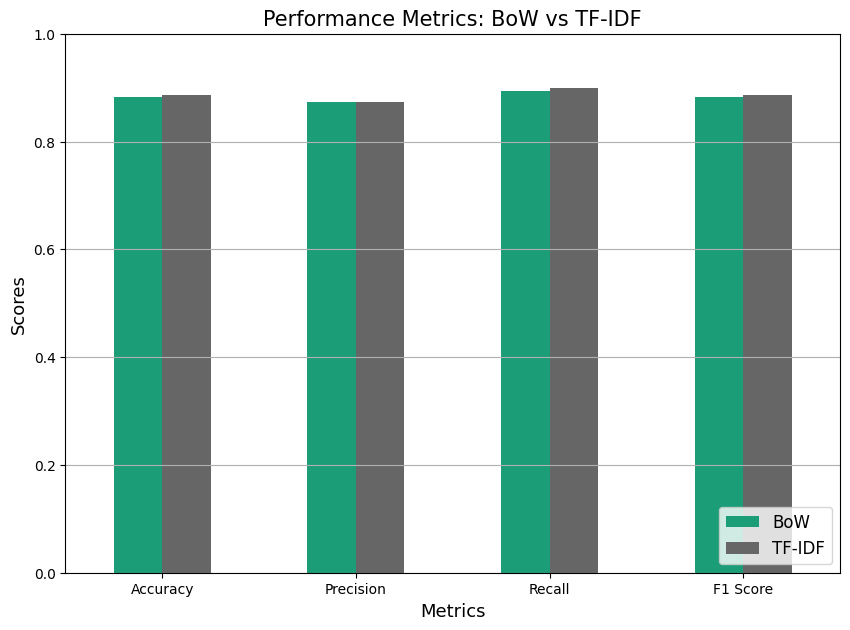

In [79]:
import matplotlib.pyplot as plt

results = pd.DataFrame({
    'BoW': [accuracy_score(y_test_bow, y_pred_bow), 
            precision_score(y_test_bow, y_pred_bow), 
            recall_score(y_test_bow, y_pred_bow), 
            f1_score(y_test_bow, y_pred_bow)],
    'TF-IDF': [accuracy_score(y_test_tfidf, y_pred_tfidf),
               precision_score(y_test_tfidf, y_pred_tfidf),
               recall_score(y_test_tfidf, y_pred_tfidf),
               f1_score(y_test_tfidf, y_pred_tfidf)]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Plot the results
results.plot(kind='bar', figsize=(10, 7), colormap='Dark2', rot=0)
plt.ylabel("Scores", fontsize=13)
plt.xlabel("Metrics", fontsize=13)
plt.title("Performance Metrics: BoW vs TF-IDF", fontsize=15)
plt.legend(loc='lower right', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


TF-IDF stands for "Term Frequency-Inverse Document Frequency." It is a numerical statistic used to reflect how important a word is to a document in a collection or corpus. The TF-IDF value increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general.

TF-IDF is one of the most popular term-weighting schemes today. It has been successfully used in various domains including text retrieval, user modeling, text classification, etc.

##### Sentiment Analysis with Word Embeddings

In [19]:
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np

In [20]:
word2vec_model = Word2Vec(sentences=preprocessed_reviews, vector_size=100, window=5, min_count=1, workers=4)

In [21]:
# Function to convert a review to a vector by averaging word vectors
def review_to_vector(review):
    return np.mean([word2vec_model.wv[word] for word in review], axis=0)

In [22]:
# Convert the preprocessed movie reviews into vectors
reviews_word2vec = np.array([review_to_vector(review) for review in preprocessed_reviews])

In [23]:
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(reviews_word2vec, labels, test_size=0.2, random_state=42)

In [24]:
clf_w2v = LogisticRegression()
clf_w2v.fit(X_train_w2v, y_train_w2v)

/home/sher4672/projects/def-hsajjad/sher4672/miniconda3/envs/IKE_editing/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predict on the test set

In [25]:
y_pred_w2v = clf_w2v.predict(X_test_w2v)

Report the accuracy, precision, recall, and F1-score on your test set

In [26]:
print("Word2Vec - Accuracy: ", accuracy_score(y_test_w2v, y_pred_w2v))
print("Word2Vec - Precision: ", precision_score(y_test_w2v, y_pred_w2v))
print("Word2Vec - Recall: ", recall_score(y_test_w2v, y_pred_w2v))
print("Word2Vec - F1 Score: ", f1_score(y_test_w2v, y_pred_w2v))


Word2Vec - Accuracy:  0.7958
Word2Vec - Precision:  0.7907069102462272
Word2Vec - Recall:  0.8012072434607646
Word2Vec - F1 Score:  0.7959224465320809


Visualize

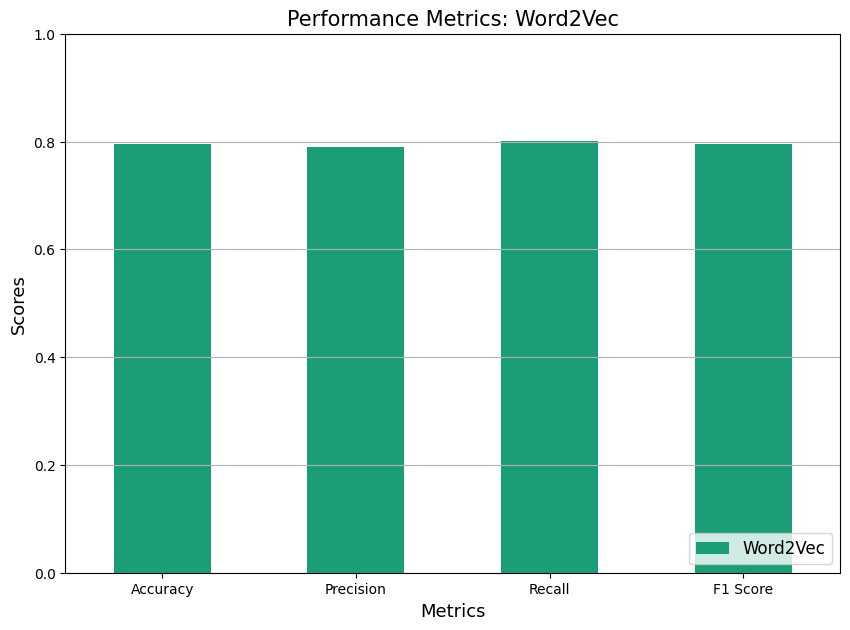

In [81]:
results_w2v = pd.DataFrame({
    'Word2Vec': [accuracy_score(y_test_w2v, y_pred_w2v),
                 precision_score(y_test_w2v, y_pred_w2v),
                 recall_score(y_test_w2v, y_pred_w2v),
                 f1_score(y_test_w2v, y_pred_w2v)]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Plot the results using the Dark2 colormap and style
results_w2v.plot(kind='bar', figsize=(10, 7), colormap='Dark2', rot=0)
plt.ylabel("Scores", fontsize=13)
plt.xlabel("Metrics", fontsize=13)
plt.title("Performance Metrics: Word2Vec", fontsize=15)
plt.legend(loc='lower right', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


###### Emotion Classification

In [28]:
print(semeval_data['train'][0])

{'ID': '2017-En-21441', 'Tweet': "“Worry is a down payment on a problem you may never have'. \xa0Joyce Meyer.  #motivation #leadership #worry", 'anger': False, 'anticipation': True, 'disgust': False, 'fear': False, 'joy': False, 'love': False, 'optimism': True, 'pessimism': False, 'sadness': False, 'surprise': False, 'trust': True}


In [36]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
emotion_labels = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']

In [38]:
semeval_reviews = [preprocess_text(example['Tweet']) for example in semeval_data['train']]
semeval_reviews_str = [' '.join(review) for review in semeval_reviews]

In [39]:
# Create a list of lists for the labels, where each inner list contains the emotion labels for a tweet
semeval_labels = [[emotion for emotion in emotion_labels if example[emotion]] for example in semeval_data['train']]

In [40]:
mlb = MultiLabelBinarizer()
semeval_labels_bin = mlb.fit_transform(semeval_labels)

In [43]:
def review_to_vector(review):
    # Get the Word2Vec vectors for the words that exist in the model's vocabulary
    vectors = [word2vec_model.wv[word] for word in review if word in word2vec_model.wv]
    # If the review does not contain any word in the model's vocabulary, return a zero vector
    if not vectors:
        return np.zeros(word2vec_model.vector_size)
    # Otherwise, return the mean of the Word2Vec vectors
    return np.mean(vectors, axis=0)

In [44]:
vectorizer_semeval_bow = CountVectorizer()
semeval_reviews_bow = vectorizer_semeval_bow.fit_transform(semeval_reviews_str)

In [48]:
print("BoW Model Performance:")
print(classification_report(y_test_semeval_bow, y_pred_semeval_bow, target_names=mlb.classes_))

print("Word2Vec Model Performance:")
print(classification_report(y_test_semeval_w2v, y_pred_semeval_w2v, target_names=mlb.classes_))

BoW Model Performance:
              precision    recall  f1-score   support

       anger       0.74      0.69      0.71       507
anticipation       0.30      0.32      0.31       200
     disgust       0.66      0.64      0.65       516
        fear       0.76      0.64      0.69       283
         joy       0.74      0.73      0.73       507
        love       0.46      0.60      0.52       136
    optimism       0.60      0.65      0.62       400
   pessimism       0.28      0.33      0.30       166
     sadness       0.58      0.56      0.57       424
    surprise       0.31      0.26      0.29        76
       trust       0.17      0.18      0.18        71

   micro avg       0.60      0.60      0.60      3286
   macro avg       0.51      0.51      0.51      3286
weighted avg       0.61      0.60      0.60      3286
 samples avg       0.60      0.61      0.57      3286

Word2Vec Model Performance:
              precision    recall  f1-score   support

       anger       0.52    

/home/sher4672/projects/def-hsajjad/sher4672/miniconda3/envs/IKE_editing/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sher4672/projects/def-hsajjad/sher4672/miniconda3/envs/IKE_editing/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sher4672/projects/def-hsajjad/sher4672/miniconda3/envs/IKE_editing/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `


From the performance metrics, it appears that the BoW model generally performs better than the Word2Vec model in terms of precision, recall, and F1-score. The BoW model has higher values in these metrics for almost all emotion categories.

The BoW method treats each word as a separate feature and doesn't consider the semantic relationships between words. It works well when the dataset is large, and the presence (or absence) of specific words is strongly associated with the target variable (in this case, the emotion labels).

On the other hand, Word2Vec provides word embeddings that capture semantic similarities between words. However, when used with simple models like logistic regression, Word2Vec might not perform as well as BoW. This is especially true when the dataset is large and diverse, and the sentiment of a sentence is more determined by the specific words it contains rather than the semantic context.

However, both models could be improved. For instance, you could use more advanced machine learning models that can capture the interactions between different words. You could also tune the hyperparameters of the Word2Vec model and the logistic regression models to possibly improve their performances.

As for the class imbalance issue, it appears that some emotion categories (e.g., 'trust', 'surprise', 'pessimism') have fewer samples than others. The class imbalance could affect the models' performances, especially for the classes with fewer samples. The models might be biased towards the classes with more samples. One way to address this issue is to use resampling techniques (like over-sampling the minority classes or under-sampling the majority classes) or to use class weights to give more importance to the minority classes during model training.

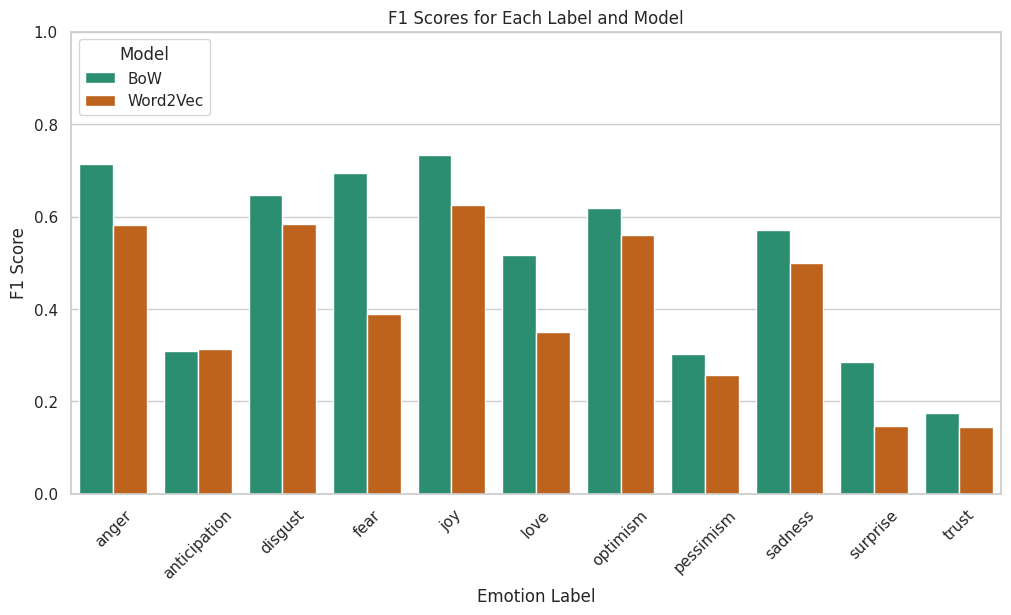

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
import pandas as pd

# Calculate F1 scores for each label
f1_scores_bow = f1_score(y_test_semeval_bow, y_pred_semeval_bow, average=None)
f1_scores_w2v = f1_score(y_test_semeval_w2v, y_pred_semeval_w2v, average=None)

# Create a DataFrame for the F1 scores
df_f1_scores = pd.DataFrame({
    'Label': mlb.classes_,
    'BoW': f1_scores_bow,
    'Word2Vec': f1_scores_w2v
})

# Convert the DataFrame to long format for easier plotting
df_f1_scores_long = df_f1_scores.melt(id_vars='Label', value_vars=['BoW', 'Word2Vec'], var_name='Model', value_name='F1 Score')

# Set the style using Seaborn
sns.set(style='whitegrid')

# Create a bar plot for the F1 scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Label', y='F1 Score', hue='Model', data=df_f1_scores_long, palette='Dark2')
plt.title('F1 Scores for Each Label and Model')
plt.xlabel('Emotion Label')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.legend(title='Model', loc='upper left')
plt.ylim(0, 1)
plt.show()


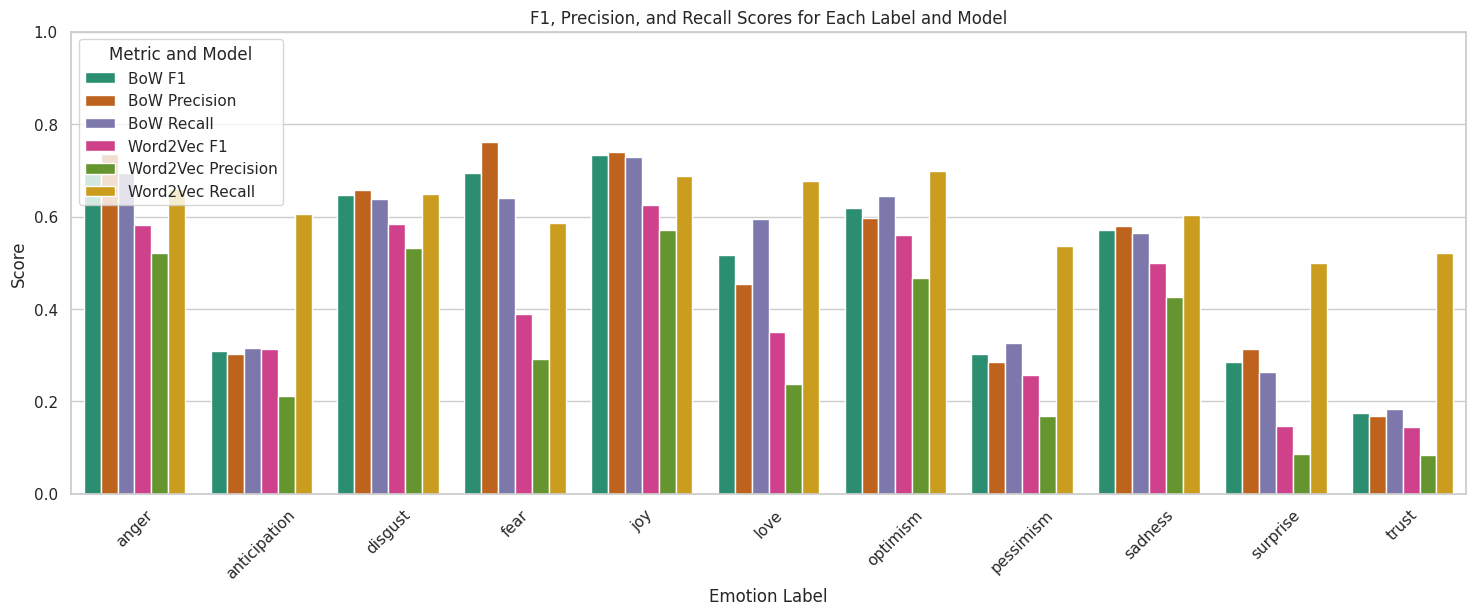

In [83]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall for each label
precision_scores_bow = precision_score(y_test_semeval_bow, y_pred_semeval_bow, average=None)
recall_scores_bow = recall_score(y_test_semeval_bow, y_pred_semeval_bow, average=None)
precision_scores_w2v = precision_score(y_test_semeval_w2v, y_pred_semeval_w2v, average=None)
recall_scores_w2v = recall_score(y_test_semeval_w2v, y_pred_semeval_w2v, average=None)

# Create a DataFrame for the scores
df_scores = pd.DataFrame({
    'Label': mlb.classes_,
    'BoW F1': f1_scores_bow,
    'BoW Precision': precision_scores_bow,
    'BoW Recall': recall_scores_bow,
    'Word2Vec F1': f1_scores_w2v,
    'Word2Vec Precision': precision_scores_w2v,
    'Word2Vec Recall': recall_scores_w2v
})

# Convert the DataFrame to long format for easier plotting
df_scores_long = df_scores.melt(id_vars='Label', var_name='Metric and Model', value_vars=['BoW F1', 'BoW Precision', 'BoW Recall', 'Word2Vec F1', 'Word2Vec Precision', 'Word2Vec Recall'], value_name='Score')

# Set the style using Seaborn
sns.set(style='whitegrid')

# Create a bar plot for the scores
plt.figure(figsize=(18, 6))
sns.barplot(x='Label', y='Score', hue='Metric and Model', data=df_scores_long, palette='Dark2')
plt.title('F1, Precision, and Recall Scores for Each Label and Model')
plt.xlabel('Emotion Label')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric and Model', loc='upper left')
plt.ylim(0, 1)
plt.show()


##### Q5: Topic Modeling

In [57]:
#!pip install pyLDAvis --upgrade

Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/avx2, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic


In [60]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
#import pyLDAvis.sklearn

In [69]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000)
dtm_tf = vectorizer.fit_transform(semeval_reviews_str)
tf_feature_names = vectorizer.get_feature_names_out()

In [70]:
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(dtm_tf)

LatentDirichletAllocation(n_components=5, random_state=0)

In [71]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, n_topics, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}', fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

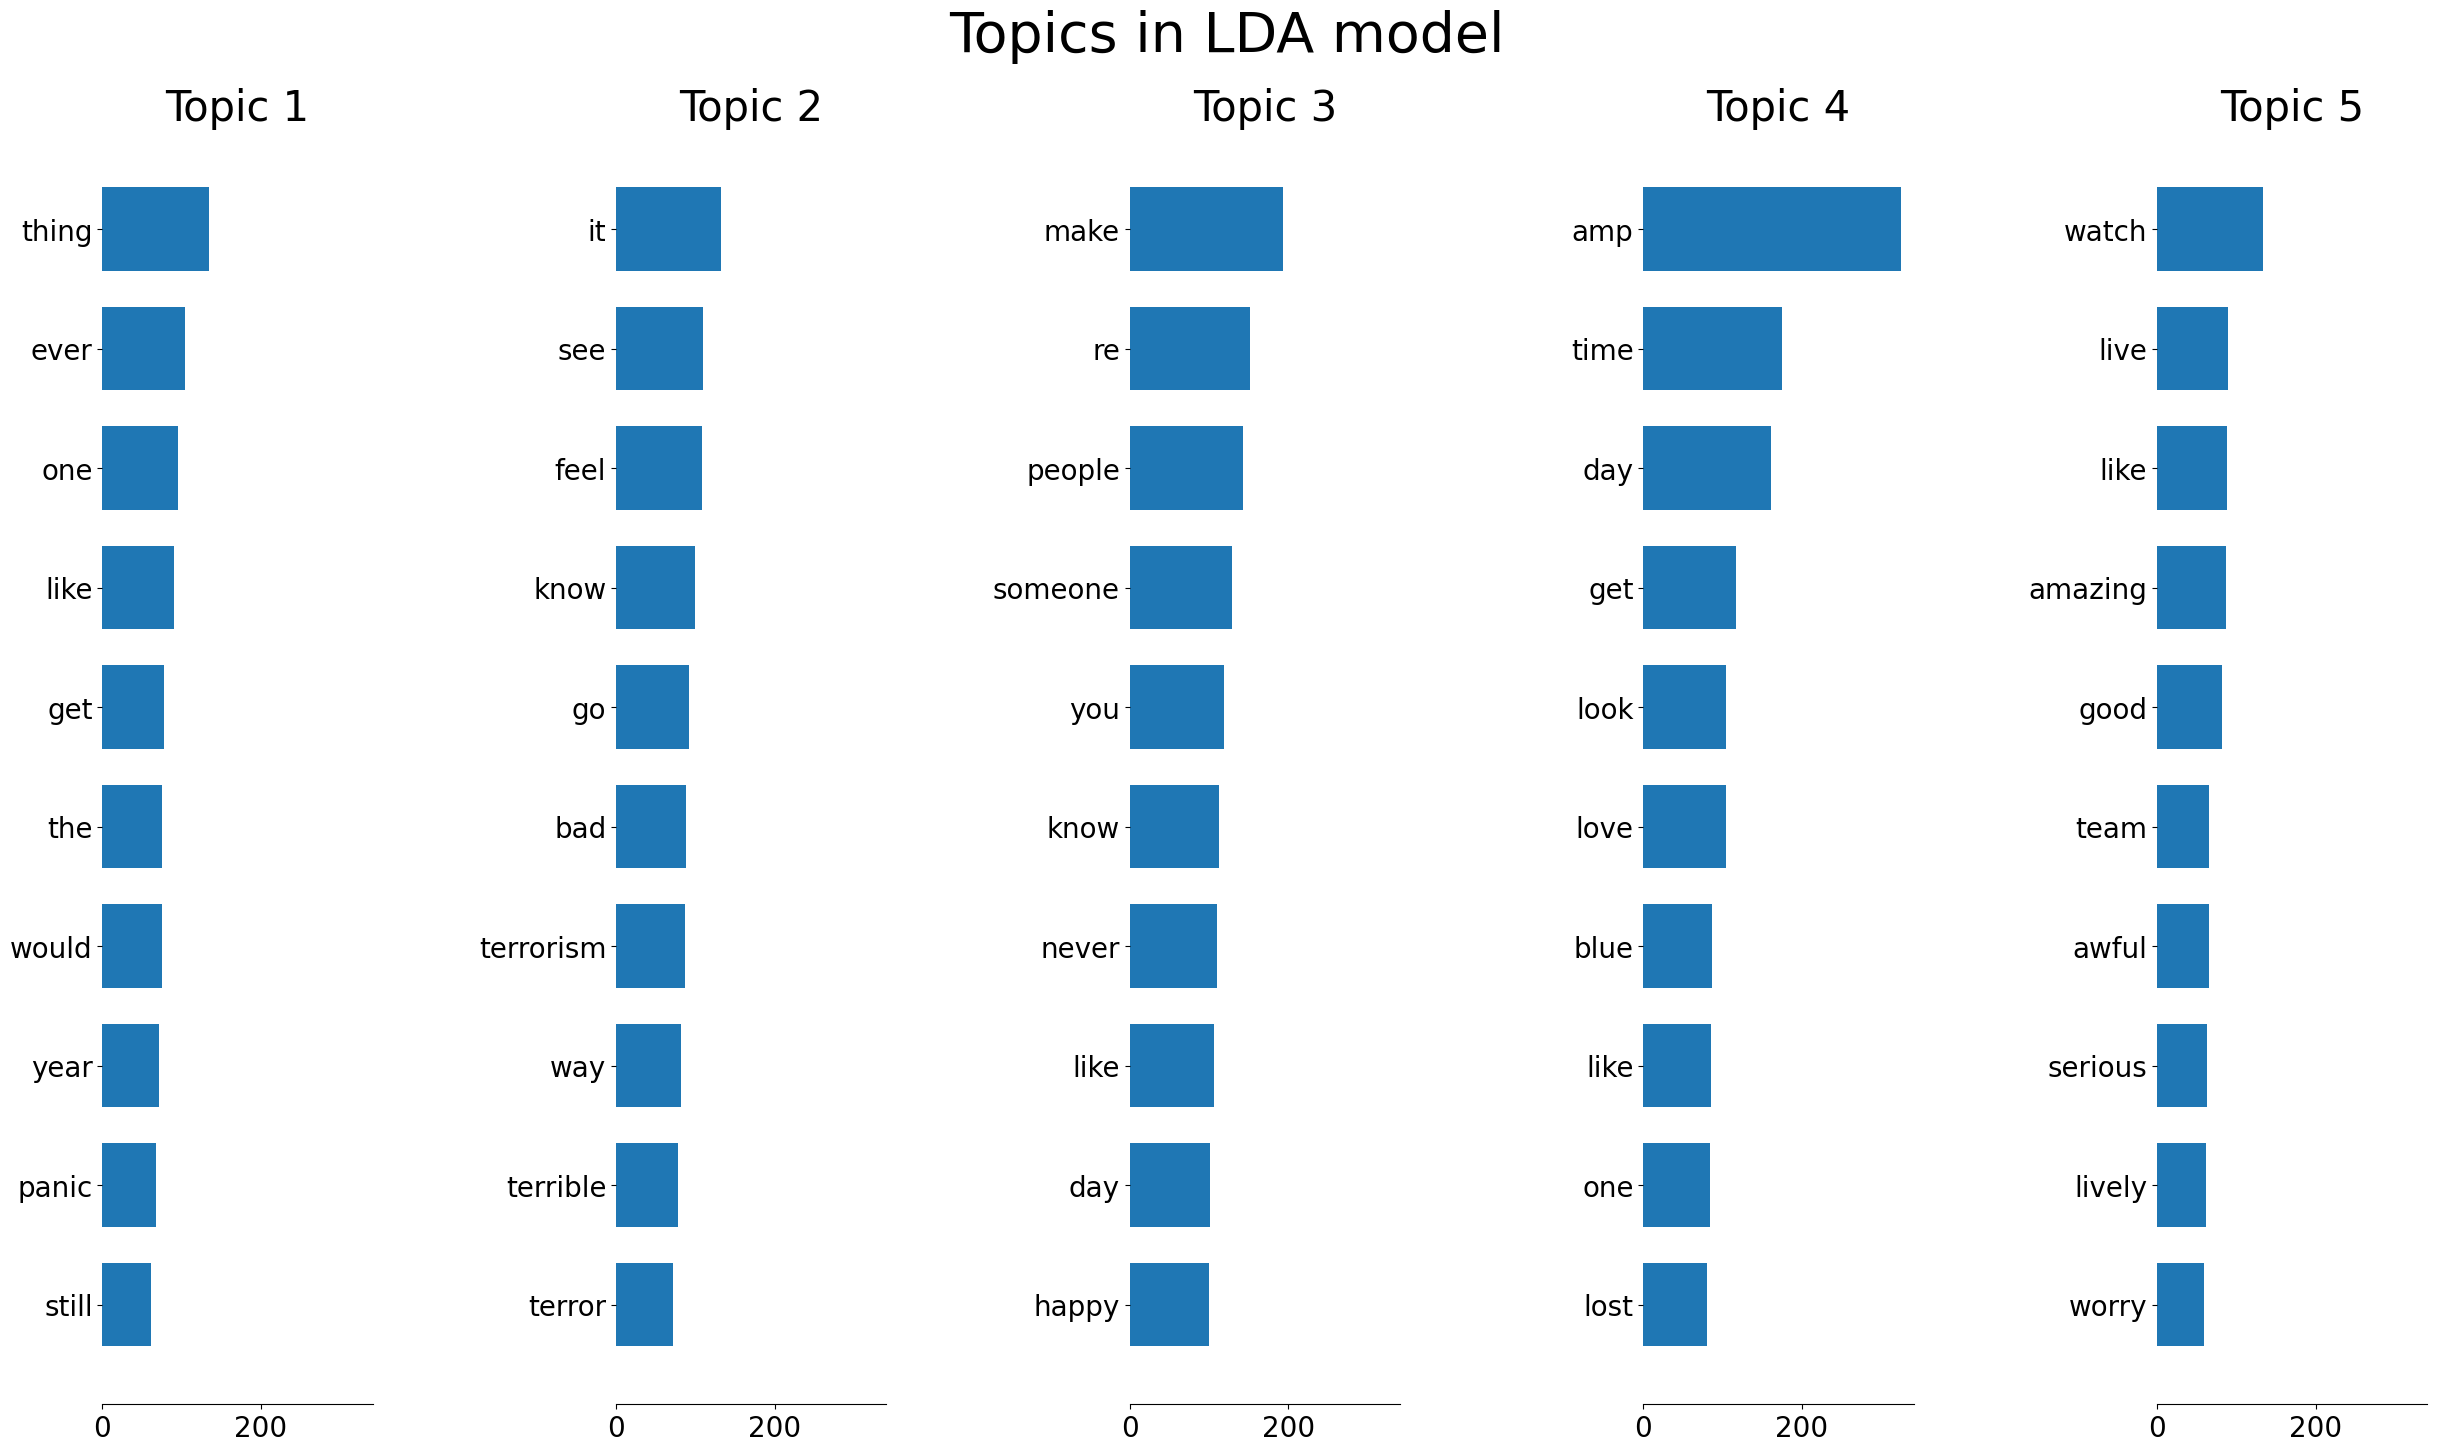

In [72]:
plot_top_words(lda, tf_feature_names, 10, 'Topics in LDA model')

In [73]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

In [74]:
print("Topics in LDA model:")
tf_feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, 10)

Topics in LDA model:
Topic #1:
thing ever one like get the would year panic still

Topic #2:
it see feel know go bad terrorism way terrible terror

Topic #3:
make re people someone you know never like day happy

Topic #4:
amp time day get look love blue like one lost

Topic #5:
watch live like amazing good team awful serious lively worry



Topic 1: Negative Emotions / Conflict: Words such as "fear", "want", "think", "make", "people", "rage", and "like" suggest this topic might be about expressing negative emotions or conflict. <br><br>
Topic 2: Positive Emotions / Affection: Words like "good", "love", "watch", "smile", "live", "blue", "amazing", and "thing" suggest this topic could be about positive emotions or expressions of affection.  <br><br>
Topic 3: Personal Struggles / Religious Sentiments: Words such as "amp", "know", "life", "feel", "need", "lol", "anxiety", "god", and "anger" suggest this topic might be about personal struggles, emotions, or religious sentiments.  <br><br>
Topic 4: Daily Life / Emotions: Words such as "day", "people", "new", "today", "got", "ve", "sad", "look", "like", and "night" suggest this topic might be about daily life and the emotions experienced in it.  <br><br>
Topic 5: Gaming / Mixed Emotions: Words such as "time", "happy", "lost", "make", "best", "sadness", "horror", "game", "like", and "bitter" suggest this topic might be about gaming and mixed emotions.

LDA has done a reasonable job here of clustering related words together into topics, but the results can sometimes be difficult to interpret, and the topic assignments for individual documents are often not as clear-cut as we might like. This is a known limitation of LDA and topic models more generally. There are more advanced models and techniques out there that can potentially yield better results, but LDA is a good starting point for topic modeling due to its simplicity and interpretability.